# **Import Necessary Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# **Import Dataset**

In [3]:
!wget https://raw.githubusercontent.com/chinmay-rajpurohit/datasets/main/snads.csv
data_f= pd.read_csv('snads.csv')
data_f.head()

--2024-09-19 06:51:51--  https://raw.githubusercontent.com/chinmay-rajpurohit/datasets/main/snads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45217 (44K) [text/plain]
Saving to: ‘snads.csv’

snads.csv           100%[===================>]  44.16K  --.-KB/s    in 0.01s   

2024-09-19 06:51:51 (3.68 MB/s) - ‘snads.csv’ saved [45217/45217]



,Name,Country,Industry,Net Worth (in billions),Company
0,Rob Walton,Mexico,Finance,8.50,Walmart
1,Sergey Brin,USA,Automotive,44.76,Google
2,Steve Ballmer,USA,Manufacturing,13.43,Koch Industries
3,Mukesh Ambani,USA,Technology,120.44,Google
4,Jim Walton,USA,Fashion,122.39,Walmart


# **Graph Creation**

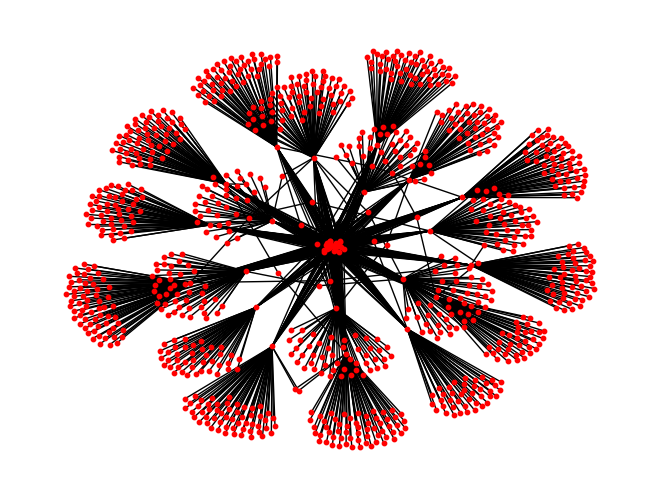

Graph with 1032 nodes and 1564 edges


In [4]:
R_Graph = nx.Graph()
for i, row in data_f.iterrows():
    R_Graph.add_edge(row['Name'], row['Country'])
    R_Graph.add_edge(row['Name'], row['Industry'])
    R_Graph.add_edge(row['Name'], row['Company'])
    R_Graph.add_edge(row['Name'], row['Net Worth (in billions)'])


nx.draw(R_Graph, node_color='red', edge_color='black', node_size=10)
plt.show()
print(R_Graph)

# **Degree Distribution**

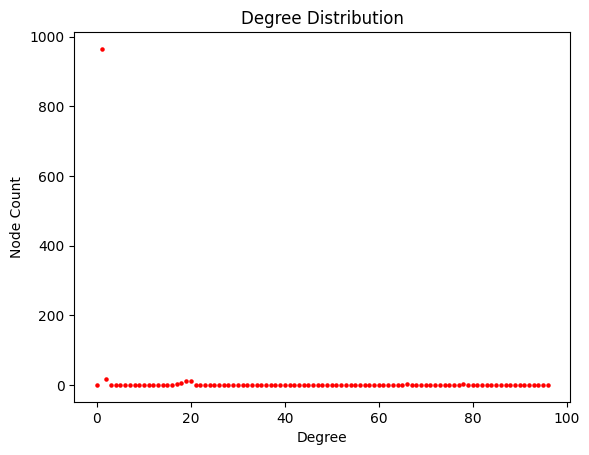

In [ ]:
degree_distribution = nx.degree_histogram(R_Graph)
degrees = list(range(len(degree_distribution)))

plt.scatter(degrees,degree_distribution, color='red',s=5)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Node Count")
plt.show()

# **Assign sizes to vertices based on their total degree**

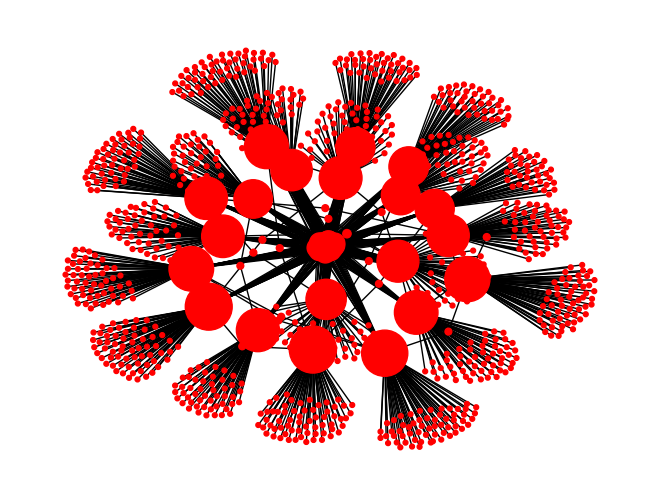

Graph with 1032 nodes and 1564 edges


In [ ]:
size_of_nodes = [d * 12 for n, d in R_Graph.degree()]
nx.draw(R_Graph, node_size=size_of_nodes, node_color='red', edge_color='black')
plt.show()
print(R_Graph)

# **Bottom 10% nodes based on degree**

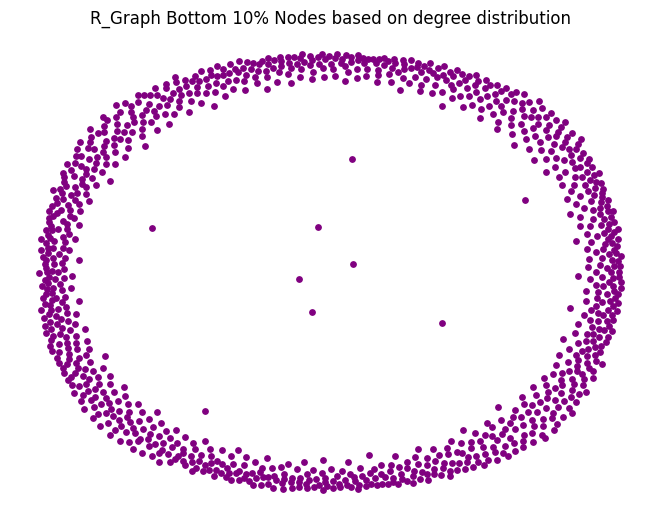

Graph with 965 nodes and 0 edges


In [ ]:
degrees = [degree for node, degree in R_Graph.degree()]
R_Graph_bottom_10_percent_degree = sorted(degrees)[:int(len(degrees) * 0.1)]
R_Graph_bottom_10_nodes = [node for node, Degree in R_Graph.degree() if Degree in R_Graph_bottom_10_percent_degree]
R_Graph_bottom_10 = R_Graph.subgraph(R_Graph_bottom_10_nodes)

plt.figure()
nx.draw(R_Graph_bottom_10,node_size=15, node_color='purple', edge_color='black')
plt.title("R_Graph Bottom 10% Nodes based on degree distribution")
plt.show()
print(R_Graph_bottom_10)

# **Top 5% nodes based on degree**

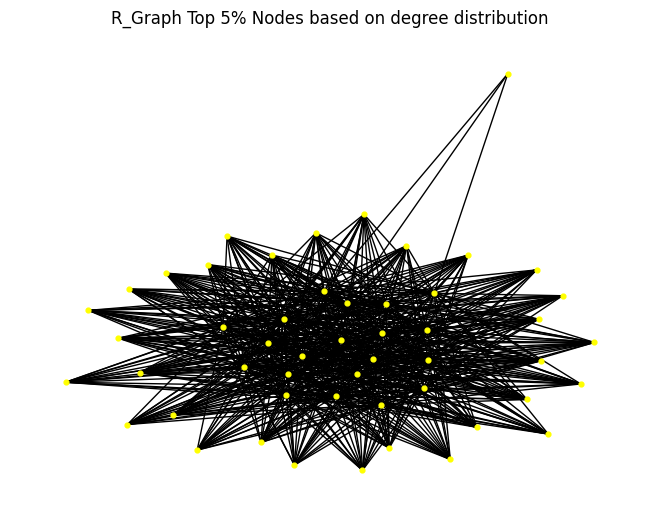

Graph with 51 nodes and 567 edges


In [ ]:
degrees = [degree for node, degree in R_Graph.degree()]
R_Graph_top_5_percent_degree = sorted(degrees)[-int(len(degrees) * 0.05):]
R_Graph_top_5_nodes = [node for node, Degree in R_Graph.degree() if Degree in R_Graph_top_5_percent_degree]
R_Graph_top_5 = R_Graph.subgraph(R_Graph_top_5_nodes)

plt.figure()
nx.draw(R_Graph_top_5,node_size=12, node_color='yellow', edge_color='black')
plt.title("R_Graph Top 5% Nodes based on degree distribution")
plt.show()
print(R_Graph_top_5)

# **Union view of both Graph**

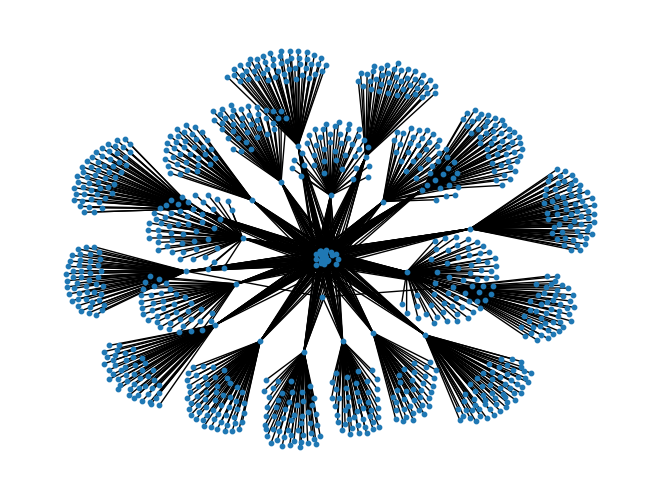

Graph with 1016 nodes and 1532 edges


In [ ]:
union_of_both_nodes= set(R_Graph_bottom_10.nodes()).union(set(R_Graph_top_5.nodes()))
union_R_Graph= R_Graph.subgraph(union_of_both_nodes)
nx.draw(union_R_Graph,node_size=10)
plt.show()
print(union_R_Graph)

# **All the connected components in the network**

In [ ]:
R_Graph_Components= nx.number_connected_components(R_Graph)
print("All the connected components of the network  :", end=" ")
print(R_Graph_Components)

All the connected components of the network  : 1


# **The size of the giant component of the network**

In [ ]:
Giant_Component_of_Network= max(nx.connected_components(R_Graph), key=len)
size_of_the_giant_component= len(Giant_Component_of_Network)
print("The size of the giant component of the network :", end=" ")
print(size_of_the_giant_component)

The size of the giant component of the network : 1032
